In [9]:
import gym
import matplotlib.image as mpimg
from gym import spaces
import matplotlib.pyplot as plt

In [14]:
class WarehouseRobotEnv(gym.Env):
    def __init__(self):
        super(WarehouseRobotEnv, self).__init__()
        self.grid_size = (6, 6)
        self.action_space = spaces.Discrete(6)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size[0]), 
            spaces.Discrete(self.grid_size[1]),
            spaces.Discrete(2)
        ))
        
        self.obstacles = [(2, 2), (3, 3), (1, 4)]
        self.pickup_location = (0, 0)
        self.dropoff_location = (5, 5)
        self.reset()
        self.agent_images = [mpimg.imread("idle_agent.jpg"), mpimg.imread("agent_carrying_package.jpg")]
        self.background_image = mpimg.imread("white_background.png")
        self.package_image = mpimg.imread("package.jpg")
        self.obstacle_image = mpimg.imread("obstacle.jpg")

    def reset(self):
        self.agent_pos = (0, 0)
        self.carrying = 0
        return self.agent_pos + (self.carrying,)
    
    def step(self, action):
        x, y = self.agent_pos
        if action == 0 and y > 0:
            y -= 1
        elif action == 1 and y < self.grid_size[1] - 1:
            y += 1
        elif action == 2 and x > 0:
            x -= 1
        elif action == 3 and x < self.grid_size[0] - 1:
            x += 1
        elif action == 4 and (x, y) == self.pickup_location:
            self.carrying = 1
        elif action == 5 and (x, y) == self.dropoff_location and self.carrying:
            reward = 100
            done = True
            return (x, y, self.carrying), reward, done, {}
        if (x, y) in self.obstacles:
            reward = -20
        else:
            reward = -1
            self.agent_pos = (x, y)
        
        done = False
        return self.agent_pos + (self.carrying,), reward, done, {}
    
    def render(self):
        fig, ax = plt.subplots()
        ax.imshow(self.background_image, extent=[0, 6, 0, 6])
        
        for obs in self.obstacles:
            ax.imshow(self.obstacle_image, extent=[obs[0], obs[0]+1, obs[1], obs[1]+1])
        
        ax.imshow(self.package_image, extent=[self.pickup_location[0], self.pickup_location[0]+1, 
                                               self.pickup_location[1], self.pickup_location[1]+1])
        ax.imshow(self.agent_images[self.carrying], extent=[self.agent_pos[0], self.agent_pos[0]+1, 
                                                             self.agent_pos[1], self.agent_pos[1]+1])
        plt.xlim(0, 6)
        plt.ylim(0, 6)
        plt.grid(True)
        plt.show()

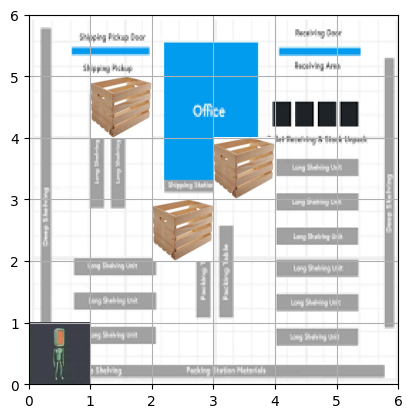

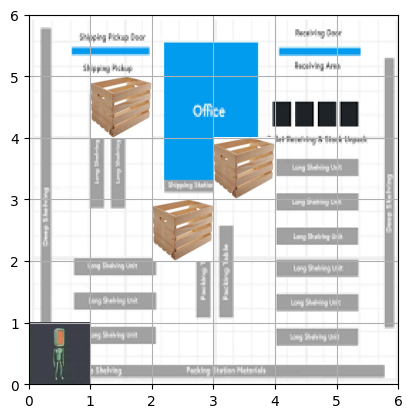

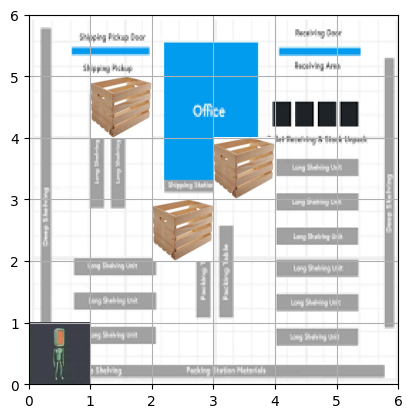

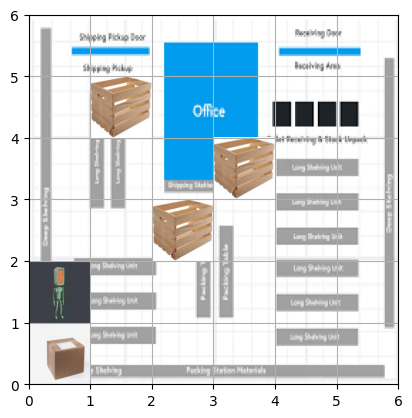

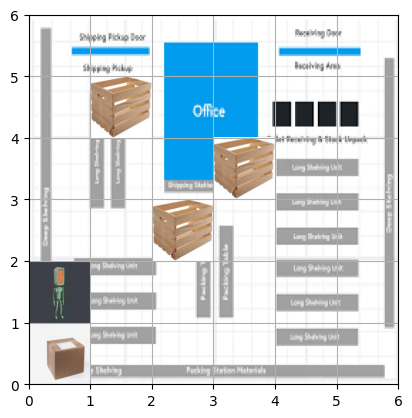

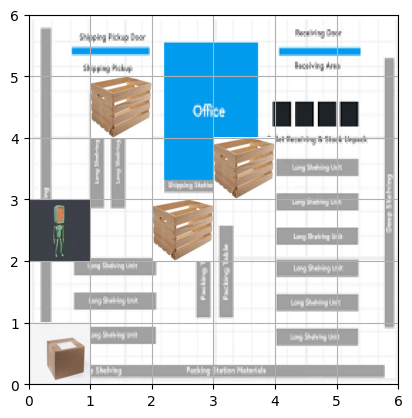

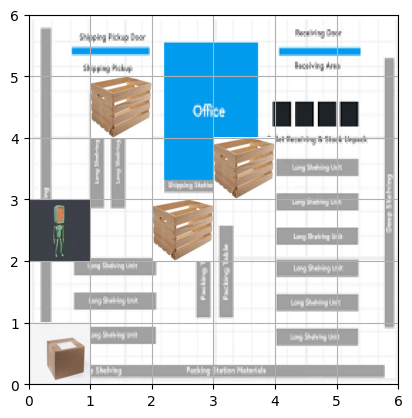

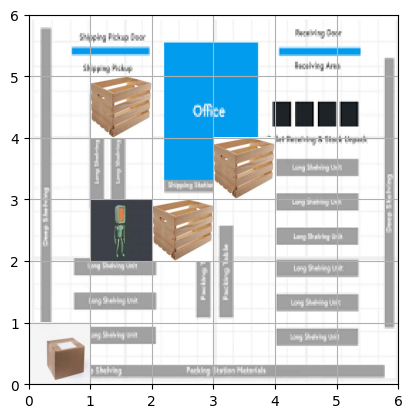

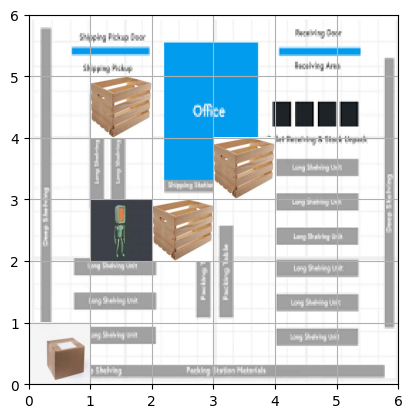

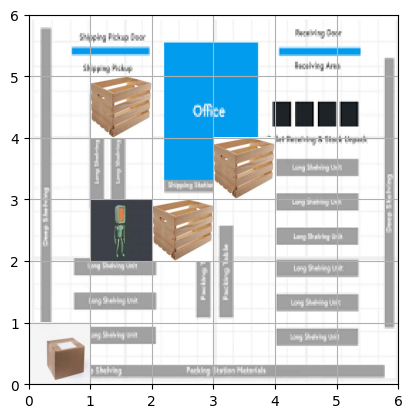

In [15]:
# Run a random agent in the environment
env = WarehouseRobotEnv()
obs = env.reset()

timesteps = 10
for _ in range(timesteps):
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    env.render()
    if done:
        break